In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/VEL-USER/Downloads/cars.csv', sep = ';', quotechar = '"', dtype = {'Origin':'category'})

In [3]:
df.head(4)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US


In [4]:
# información que contiene cada una de las variables (tipo)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Car           406 non-null    object  
 1   MPG           406 non-null    float64 
 2   Cylinders     406 non-null    int64   
 3   Displacement  406 non-null    float64 
 4   Horsepower    406 non-null    float64 
 5   Weight        406 non-null    float64 
 6   Acceleration  406 non-null    float64 
 7   Model         406 non-null    int64   
 8   Origin        406 non-null    category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 26.0+ KB


In [5]:
#Obtener información de la frecuencia absoluta como una serie de datos
x = df['Origin'].value_counts()

In [6]:
x

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

In [7]:
#Obtener información de la frecuencia absoluta y la serie de datos,Transformar este tipo de serie de datos en dataframe
x = df['Origin'].value_counts().to_frame()

In [8]:
x

,Origin
US,254
Japan,79
Europe,73


In [15]:
#suma de todos
total = x['Origin'].sum()

In [16]:
total

406

In [17]:
#función para calcular la frecuencia relativa
def freq_relative(x):
    return x/total

In [21]:
def angulo(x):
    return freq_relative(x)*360

In [18]:
freq_relative(x['Origin'])

US        0.625616
Japan     0.194581
Europe    0.179803
Name: Origin, dtype: float64

In [19]:
#asigna a x una nueva columna sobre dataframe con la iunformsación de la frecuencia relativa
x = x.assign(freq_relative=freq_relative(x['Origin']))

In [22]:
#asigna a x una nueva columna sobre dataframew con la iunformsación del ángulo
x = x.assign(angulo=angulo(x['Origin']))

In [23]:
x

,Origin,freq_relative,angulo
US,254,0.625616,225.221675
Japan,79,0.194581,70.049261
Europe,73,0.179803,64.729064


In [24]:
x.sum()

Origin           406.0
freq_relative      1.0
angulo           360.0
dtype: float64

In [26]:
x.describe()

,Origin,freq_relative,angulo
count,3.000000,3.000000,3.000000
mean,135.333333,0.333333,120.000000
std,102.812126,0.253232,91.163462
min,73.000000,0.179803,64.729064
25%,76.000000,0.187192,67.389163
50%,79.000000,0.194581,70.049261
75%,166.500000,0.410099,147.635468
max,254.000000,0.625616,225.221675


In [27]:
#Del dataframe principal agrupa los de origen Europa
europe = df.groupby('Origin').get_group('Europe')

In [39]:
#presenta solo de Europa
europe.head(3)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
361,Renault 18i,34.5,4,100.0,0.0,2320.0,15.8,81,Europe
337,Renault Lecar Deluxe,40.9,4,85.0,0.0,1835.0,17.3,80,Europe
25,Volkswagen 1131 Deluxe Sedan,26.0,4,97.0,46.0,1835.0,20.5,70,Europe


In [47]:
#Ordenar de forma ascendente
e = europe.sort_values("Horsepower", axis = 0, ascending = True,
                  inplace = True, na_position = 'last')

C:\Users\VEL-USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
europe.head(3)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
361,Renault 18i,34.5,4,100.0,0.0,2320.0,15.8,81,Europe
337,Renault Lecar Deluxe,40.9,4,85.0,0.0,1835.0,17.3,80,Europe
25,Volkswagen 1131 Deluxe Sedan,26.0,4,97.0,46.0,1835.0,20.5,70,Europe


In [48]:
e = europe.sort_values("Horsepower", axis=0, ascending = True,inplace=False, na_position='last')

In [49]:
e.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
361,Renault 18i,34.5,4,100.0,0.0,2320.0,15.8,81,Europe
337,Renault Lecar Deluxe,40.9,4,85.0,0.0,1835.0,17.3,80,Europe
25,Volkswagen 1131 Deluxe Sedan,26.0,4,97.0,46.0,1835.0,20.5,70,Europe
109,Volkswagen Super Beetle,26.0,4,97.0,46.0,1950.0,21.0,73,Europe
39,Volkswagen Super Beetle 117,0.0,4,97.0,48.0,1978.0,20.0,71,Europe


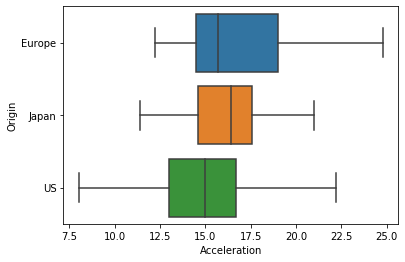

In [50]:
ax = sns.boxplot(x="Acceleration", y="Origin", data = df)

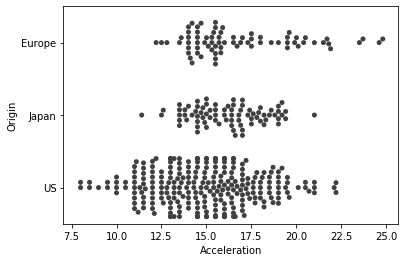

In [51]:
ax = sns.swarmplot(x="Acceleration", y="Origin", data=df, color=".25")

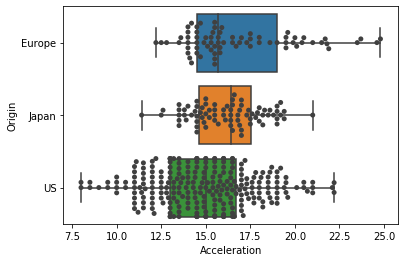

In [52]:
ax = sns.boxplot(x="Acceleration", y="Origin", data = df)
ax = sns.swarmplot(x="Acceleration", y="Origin", data=df, color=".25")